11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/40
15/15 [==============================] - 30s 305ms/step - loss: 0.6270 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/40
15/15 [==============================] - 5s 302ms/step - loss: 0.3120 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/40
15/15 [==============================] - 5s 308ms/step - loss: 0.2761 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/40
15/15 [==============================] - 5s 306ms/step - loss: 0.2695 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/40
15/15 [==============================] - 5s 307ms/step - loss: 0.2670 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/40
15/15 [==============================] - 5s 309ms/step - loss: 0.2650 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/40
15/15 [======================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 501ms/step


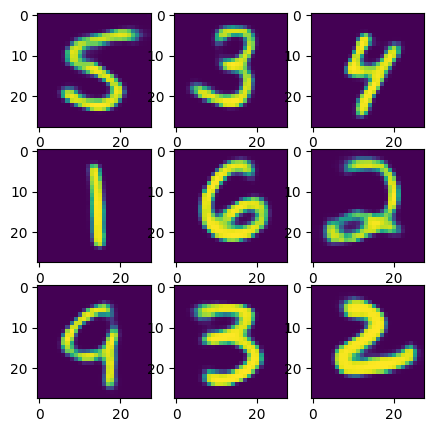

1875/1875 [==============================] - 3s 2ms/step


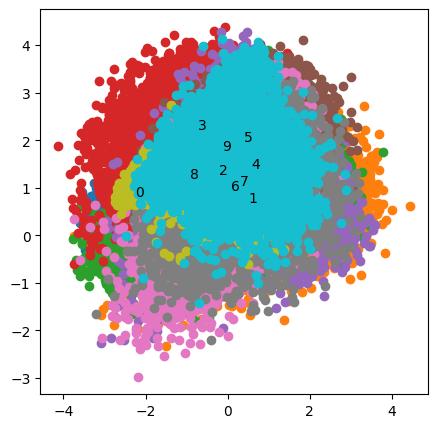

Cluster Validity Metrics (Autoencoder 1):
Silhouette Score: 0.1397687
Davies-Bouldin Index: 1.9158241436198875
Calinski-Harabasz Index: 5399.925428674519


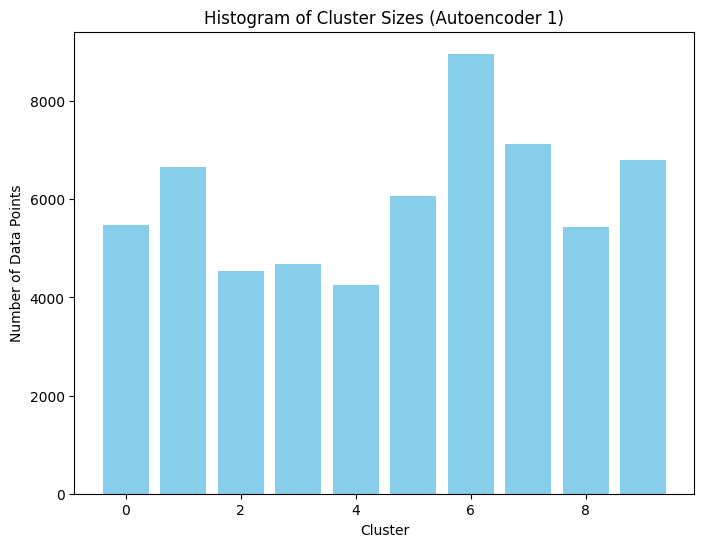

Epoch 1/320
15/15 [==============================] - 4s 30ms/step - loss: 2.0521 - accuracy: 0.1706 - precision_1: 1.0000 - recall_1: 0.1888
Epoch 2/320
15/15 [==============================] - 0s 21ms/step - loss: 1.3501 - accuracy: 0.1709 - precision_1: 1.0000 - recall_1: 0.2555
Epoch 3/320
15/15 [==============================] - 0s 20ms/step - loss: 1.2950 - accuracy: 0.1857 - precision_1: 1.0000 - recall_1: 0.3192
Epoch 4/320
15/15 [==============================] - 0s 21ms/step - loss: 1.2004 - accuracy: 0.2200 - precision_1: 1.0000 - recall_1: 0.3161
Epoch 5/320
15/15 [==============================] - 0s 20ms/step - loss: 1.0976 - accuracy: 0.2587 - precision_1: 1.0000 - recall_1: 0.3232
Epoch 6/320
15/15 [==============================] - 0s 21ms/step - loss: 1.0335 - accuracy: 0.2901 - precision_1: 1.0000 - recall_1: 0.3216
Epoch 7/320
15/15 [==============================] - 0s 20ms/step - loss: 0.9945 - accuracy: 0.3077 - precision_1: 1.0000 - recall_1: 0.3196
Epoch 8/320
1

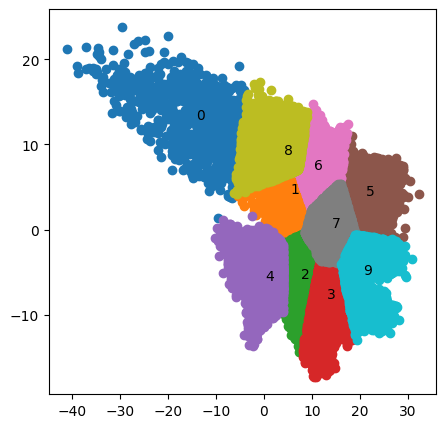

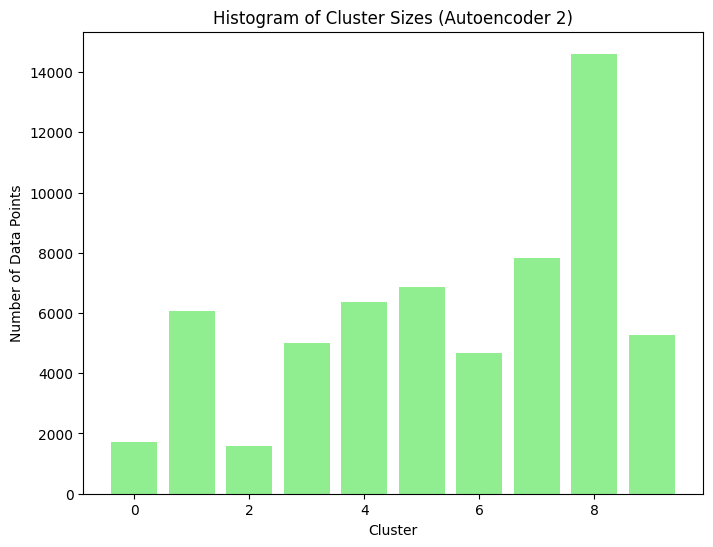

Cluster Validity Metrics (Autoencoder 2):
Silhouette Score: 0.3827745
Davies-Bouldin Index: 0.92126433192554
Calinski-Harabasz Index: 46263.60014064877


In [1]:
# MIT License
# Copyright (c) 2023 saysaysx

import matplotlib.pyplot as plt
import tensorflow.keras as krs
import numpy
from keras.datasets import mnist
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
nw = 28
nh = 28
num_hide = 98
# загружаем примеры обучения mnist (рукописные цифры)
(trainx, trainy), (testx, testy) = mnist.load_data()
# нормируем от -1 до 1 изображения цифр
all_image = (trainx/255.0-0.5)*1.999
# добавляем дополнительное измерение соответствующее одной цветовой карте
all_image = numpy.expand_dims(all_image, axis=3)
# задаем входной слой экодера высота на ширину на количество карт
encoder_input = krs.layers.Input(shape=(nw,nh,1))
# задаем сверточный слой с 32 фильтрами-картами и фильтрами 3 на 3
# оставляет тот же размер карты 28*28
lay = krs.layers.Conv2D(32, (3, 3), strides = (2,2), activation='relu', padding='same')(encoder_input)
lay = krs.layers.Dropout(0.15)(lay)
lay = krs.layers.Conv2D(64, (3, 3), strides = (2,2),activation='relu', padding='same')(lay)
# добавляем слой прореживания
lay = krs.layers.Dropout(0.15)(lay)
lay = krs.layers.Conv2D(128, (3, 3), strides = (2,2),activation='relu', padding='same')(lay)
lay = krs.layers.Dropout(0.15)(lay)
lay = krs.layers.Conv2D(256, (3, 3), strides = (2,2),activation='relu', padding='same')(lay)
# слой который многомерный тензорный слой превращает в плоский вектор
lay = krs.layers.Flatten()(lay)
# выходной кодирующий слой
lay_out_encoder = krs.layers.Dense(num_hide, activation="linear", name='den4')(lay)
# создаем сеть энкодера
encoder = krs.Model(encoder_input, lay_out_encoder)

# создание сети декодера, входной слой
decoder_input = krs.layers.Input(shape=(num_hide,))
lay = krs.layers.Dense(128*7*7)(decoder_input)
# преобразуем плоский слой в многомерный тензор 7*7*128
lay = krs.layers.Reshape(target_shape=(7,7,128))(lay)
lay = krs.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(lay)
# повышаем размерность карты в два раза, будет 14*14
# можно использовать билинейную интерполяцию если хотите
lay = krs.layers.UpSampling2D(size=(2,2))(lay)
lay = krs.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(lay)
lay = krs.layers.UpSampling2D(size=(2,2))(lay)
lay_out_decoder = krs.layers.Conv2D(1, (3, 3), activation='tanh', padding='same')(lay)
# создаем сеть декодера
decoder = krs.Model(decoder_input,lay_out_decoder)

# объединяем обе сети в автоэнкодер
lay_out = decoder(lay_out_encoder)
autoencoder = krs.Model(encoder_input,lay_out)
# полученный вид модели сохраняем в файле в виде изображения
krs.utils.plot_model(autoencoder, to_file='.\out\autoencoder.png', show_shapes=True)
# компилируем модель автоэнкодера с функцией потерь mse и скоростью обучения 0.0002
autoencoder.compile(loss='mean_squared_error', optimizer=krs.optimizers.Adam(learning_rate=0.0002),
                  metrics=['accuracy', krs.metrics.Precision(), krs.metrics.Recall()])
# запускаем 40 эпох обучения с размером батча 4000
ep = 40
autoencoder.fit(x = all_image,y = all_image,batch_size = 4000,epochs = ep)
encoder.save('encoder_model.h5')
#Добавить класификатор, на вход которого подключен предобученный энкодер

# получаем выход автоэнкодера, изображения который он получает
index = numpy.random.randint(0,len(all_image),9)
out_img = autoencoder.predict(all_image[index])
# выводим их на графике
fig = plt.figure(figsize=(5,5))
for i in range(3):
    for j in range(3):
        ax = fig.add_subplot(3,3,i*3+j+1)
        ax.imshow(out_img[i*3+j][:,:,0])
plt.show()
# реализуем работу  с энкодером получая скрытый кодовый слой
from scipy.cluster.vq import kmeans2
out_vec = encoder.predict(all_image)
out_vec_save = out_vec;
# получим центроиды кластеров для 10 кластеров
centroid, label = kmeans2(out_vec, 10, minit='++')

# получим центроиды кластеров для 2 кластеров
centroid1, label1 = kmeans2(out_vec, 2, minit='++')

# считаем координаты кластера как разность с центроидом
out_vec1 = (out_vec - centroid1[0])**2
out_vec2 = (out_vec - centroid1[1])**2
# берем среднее значение
outm = out_vec1.mean(axis=1)
outstd = out_vec2.mean(axis=1)

coutm = centroid.mean(axis=1)
coutstd = centroid.mean(axis=1)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
# рисуем на графике кластер объектов в виде среднее дисперсия
for i in range(10):
  mask = label == i
  ax.scatter(out_vec[mask,0],out_vec[mask,1])
  plt.text(centroid[i,0], centroid[i,1], i , fontdict=None)
plt.show()

# Compute silhouette score
silhouette = silhouette_score(out_vec, label)

# Compute Davies-Bouldin index
davies_bouldin = davies_bouldin_score(out_vec, label)

# Compute Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(out_vec, label)

# Print the cluster validity metrics
print("Cluster Validity Metrics (Autoencoder 1):")
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

centroid, label = kmeans2(out_vec, 10, minit='++')

# Count the number of data points in each cluster
cluster_sizes = numpy.bincount(label)

# Plot a histogram of cluster sizes
plt.figure(figsize=(8, 6))
plt.bar(range(len(cluster_sizes)), cluster_sizes, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Histogram of Cluster Sizes (Autoencoder 1)')
plt.show()

# реализуем другой способ кластеризации, с помощью автоэкодера с дескриптором размером 2
# эти два значения и будут использоваться как двумерные координаты кластера
encoder_input1 = krs.layers.Input(shape=(num_hide))
lay = krs.layers.Dense(2000, activation="relu")(encoder_input1)
lay = krs.layers.Dense(500, activation="relu")(lay)
lay = krs.layers.Dense(100, activation="relu")(lay)
lay_out_encoder1 = krs.layers.Dense(2, activation="linear", name='den')(lay)
encoder1 = krs.Model(encoder_input1, lay_out_encoder1)
decoder_input1 = krs.layers.Input(shape=(2,))
lay = krs.layers.Dense(100, activation="relu")(decoder_input1)
lay = krs.layers.Dense(500, activation="relu")(lay)
lay = krs.layers.Dense(2000, activation="relu")(lay)
lay_out_decoder1 = krs.layers.Dense(num_hide, activation="linear")(lay)
decoder1 = krs.Model(decoder_input1,lay_out_decoder1)
lay_out1 = decoder1(lay_out_encoder1)
autoencoder1 = krs.Model(encoder_input1,lay_out1)
krs.utils.plot_model(autoencoder1, to_file='.\out\autoencoder1.png', show_shapes=True)
autoencoder1.compile(loss='mean_squared_error', optimizer=krs.optimizers.Adam(learning_rate=0.0002),
                  metrics=['accuracy', krs.metrics.Precision(), krs.metrics.Recall()])

autoencoder1.fit(x = out_vec,y = out_vec,batch_size = 4000,epochs = ep*8)
out_vec = encoder1.predict(out_vec)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
centroid, label = kmeans2(out_vec, 10, minit='random')
print(label)
print(label.shape)

# рисуем полученные кластера цифр
for i in range(10):
  mask = label == i
  ax.scatter(out_vec[mask,0],out_vec[mask,1])
  plt.text(centroid[i,0], centroid[i,1], i , fontdict=None)
plt.show()

# Perform clustering on the latent space representations obtained from the encoder1
centroid1, label1 = kmeans2(out_vec, 10, minit='random')

# Count the number of data points in each cluster
cluster_sizes1 = numpy.bincount(label1)

# Plot a histogram of cluster sizes
plt.figure(figsize=(8, 6))
plt.bar(range(len(cluster_sizes1)), cluster_sizes1, color='lightgreen')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Histogram of Cluster Sizes (Autoencoder 2)')
plt.show()

# Compute silhouette score
silhouette1 = silhouette_score(out_vec, label1)

# Compute Davies-Bouldin index
davies_bouldin1 = davies_bouldin_score(out_vec, label1)

# Compute Calinski-Harabasz index
calinski_harabasz1 = calinski_harabasz_score(out_vec, label1)

# Print the cluster validity metrics
print("Cluster Validity Metrics (Autoencoder 2):")
print("Silhouette Score:", silhouette1)
print("Davies-Bouldin Index:", davies_bouldin1)
print("Calinski-Harabasz Index:", calinski_harabasz1)


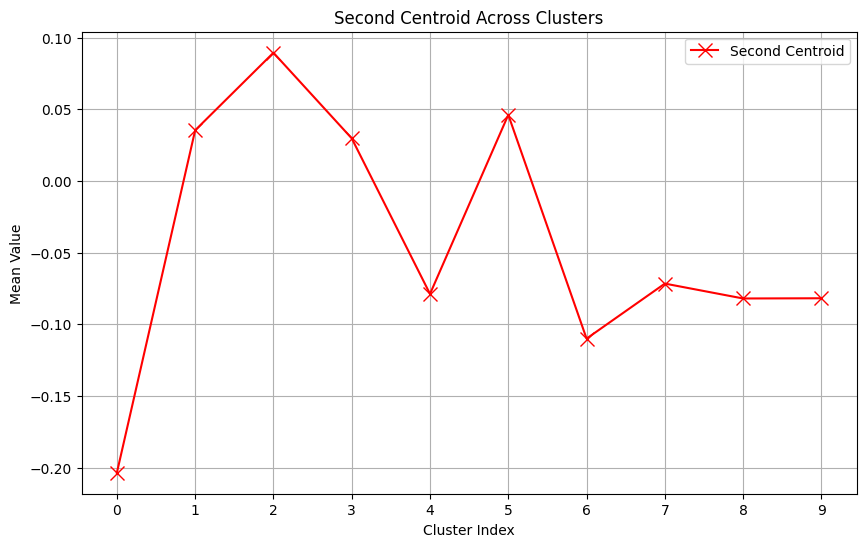

In [2]:
# Новый график
# Визуализация второй центроиды кластера

plt.figure(figsize=(10, 6))

# Рисуем линейчатый график для среднего значения второй центроиды по класстерам
plt.plot(range(len(coutm)), coutm, marker='x', color='red', markersize=10, label='Second Centroid')

plt.title('Second Centroid Across Clusters')
plt.xlabel('Cluster Index')
plt.ylabel('Mean Value')
plt.xticks(range(10))
plt.legend()
plt.grid(True)
plt.show()

In [30]:
'''Влад, придумай нормальный метод работы с классификатором'''
all_out = krs.utils.to_categorical(trainy)
num_classes = 10
classifier_input = krs.layers.Input(shape=(num_hide,))
encoder.trainable = False
lay = krs.layers.Dense(128, activation='relu')(classifier_input)
lay = krs.layers.Dropout(0.2)(lay)
lay = krs.layers.Dense(256, activation='relu')(lay)
lay = krs.layers.Dropout(0.2)(lay)
lay = krs.layers.Dense(512, activation='relu')(lay)
lay = krs.layers.Dropout(0.2)(lay)
lay = krs.layers.Dense(256, activation='relu')(lay)
lay = krs.layers.Dropout(0.2)(lay)
lay = krs.layers.Dense(128, activation='relu')(lay)
lay = krs.layers.BatchNormalization()(lay)
lay = krs.layers.Dense(10, activation='relu', kernel_initializer='random_uniform')(lay)
classifier_output = krs.layers.Dense(num_classes, activation="softmax", name='den4')(lay)
print('Shape of classifier_output:', classifier_output.shape)
classificator = krs.Model(classifier_input, classifier_output)
classificator.compile(loss='binary_crossentropy', optimizer=krs.optimizers.Adam(learning_rate = 0.0002),
                      metrics=['accuracy', krs.metrics.Precision(), krs.metrics.Recall()])
classificator.fit(x = out_vec_save, y = all_out, batch_size = 8000 ,epochs = ep * 2)
test_out_vec = encoder.predict(numpy.expand_dims((testx/255.0-0.5)*1.999, axis=3))
predictions = classificator.predict(test_out_vec)
classificator.save('classificator_model.h5')

Shape of classifier_output: (None, 10)
Epoch 1/80
8/8 [==============================] - 2s 17ms/step - loss: 0.6695 - accuracy: 0.1217 - precision_14: 0.0000e+00 - recall_14: 0.0000e+00
Epoch 2/80
8/8 [==============================] - 0s 15ms/step - loss: 0.6396 - accuracy: 0.2247 - precision_14: 1.0000 - recall_14: 8.3333e-05
Epoch 3/80
8/8 [==============================] - 0s 12ms/step - loss: 0.6042 - accuracy: 0.2863 - precision_14: 0.9570 - recall_14: 0.0082
Epoch 4/80
8/8 [==============================] - 0s 12ms/step - loss: 0.5741 - accuracy: 0.3078 - precision_14: 0.9506 - recall_14: 0.0391
Epoch 5/80
8/8 [==============================] - 0s 11ms/step - loss: 0.5501 - accuracy: 0.3138 - precision_14: 0.9470 - recall_14: 0.0601
Epoch 6/80
8/8 [==============================] - 0s 12ms/step - loss: 0.5296 - accuracy: 0.3156 - precision_14: 0.9365 - recall_14: 0.0726
Epoch 7/80
8/8 [==============================] - 0s 11ms/step - loss: 0.5117 - accuracy: 0.3220 - precision_

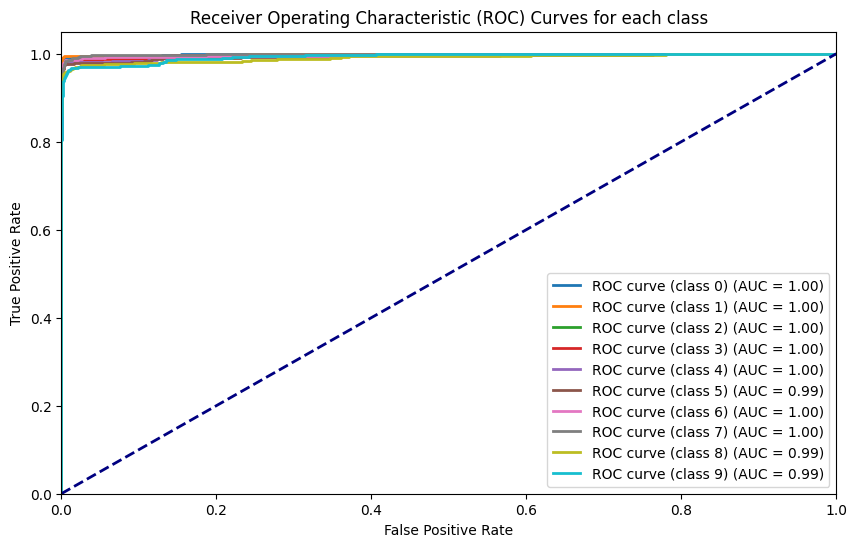

In [31]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve((testy == i).astype(int), predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for each class')
plt.legend(loc="lower right")
plt.show()

In [32]:
out_img_predict = classificator.predict(out_vec_save)
numer_out = 0
for i in range(17):
  for j in range(10):
    if all_out[i][j] == 1:
      numer_out = j
  print(out_img_predict[i][numer_out], 9 - numer_out)
  # print(out_img_predict[i], all_out[i])

1875/1875 [==============================] - 3s 2ms/step
0.84240854 4
0.74784684 9
0.94481796 5
0.96766514 8
0.9645201 0
0.92595583 7
0.9649342 8
0.75435615 6
0.9565342 8
0.96568155 5
0.72059214 6
0.91328126 4
0.7229996 6
0.93595815 3
0.9582626 8
0.95799416 2
0.91974825 7


In [33]:
out_img_predict = classificator.predict(out_vec_save)
for i in range(17):
  print(out_img_predict[i], all_out[i])

1875/1875 [==============================] - 4s 2ms/step
[4.9216840e-02 4.6881437e-04 9.3994709e-03 1.0940502e-02 2.1760205e-02
 8.4240854e-01 6.1503302e-02 8.5566171e-06 2.2860358e-03 2.0077080e-03] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[7.4784684e-01 2.2785023e-02 5.2841852e-04 3.4217149e-02 4.4087369e-02
 1.2381490e-01 1.4210593e-02 4.7720515e-04 9.4693195e-04 1.1085490e-02] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.2212006e-02 1.3234350e-03 6.0961436e-05 1.2580464e-05 9.4481796e-01
 3.0618461e-04 3.1449358e-04 7.8785829e-03 1.6359175e-02 1.6714612e-02] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[6.6956067e-03 9.6766514e-01 5.5484395e-03 3.4005188e-05 7.3584216e-04
 1.7425722e-05 2.3157105e-03 8.6803455e-04 4.0460355e-03 1.2073629e-02] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[4.3093818e-03 1.0601655e-03 1.1386417e-03 4.1848140e-05 1.1070750e-02
 7.4516623e-07 7.6399054e-03 1.0118331e-03 9.2066051e-03 9.6452010e-01] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.00675959 0.00667448 0.92595583 0.0026134  0.01321446 0.01235265
 